### 数据预处理
---
*这部分过程在 process_data.py 文件中, 处理的结果保存在res.csv中*

---

#### 编码模式转化

源文件是gbd文件, 通过ultraedit将其转化为utf-8类型的文件

#### 文件读取

该数据集是xml文件, 而且是多个`<doc>`的集合, 无法直接通过第三方库进行转化, 因此对每一个`<doc>`分片处理, 提取它的url title 以及 content 将其存到一个dict中

我们有用的只有新闻的主要内容及其标签, 标签由其url决定, 因此保存为dataframe类型可以方便的查看每个标签有多少个值

In [1]:
import pandas as pd
df = pd.read_csv('res.csv')
df.head()

,Unnamed: 0,label,content
0,0,news.sohu.com,公安机关销毁１０余万非法枪支 跨国武器走私渐起中广网唐山６月１２日消息（记者汤一亮 庄胜春）...
1,1,news.sohu.com,张绍刚发道歉信网友不认可：他的问题是俯视他人（图）天津卫视求职节目《非你莫属》“晕倒门”事件...
2,2,news.sohu.com,＃（关注夏收）（３）夫妻“麦客”忙麦收临沂（山东），２０１２年６月４日 夫妻“麦客”忙麦收 ...
3,3,news.sohu.com,欧洲杯大战在即 荷兰葡萄牙面临淘汰将背水一战中广网北京６月１３日消息（记者王宇）据中国之声《...
4,4,news.sohu.com,扎克伯格携妻罗马当街吃３０元麦当劳午餐（组图）环球网记者李亮报道，正在意大利度蜜月的“脸谱”...


可以看到, 原数据处理之后, 按照url来分配的话, 共有287个标签

In [30]:
print(len(df.label.unique()))

287


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

### 数据分布可视化

我们按照数据量大小进行排布,由于大部分的数据都集中于前几个url,因此,选取前十个url进行作图

从结果来看, 前几个的url并不是按照类型均匀分布

(['news.163.com', 'news.sohu.com', 'www.people.com.cn', 'henan.people.com.cn', 'news.cn.yahoo.com', 'ent.cn.yahoo.com', 'sports.cn.yahoo.com', 'finance.people.com.cn', 'world.people.com.cn', 'ha.people.com.cn'], [208128, 85448, 71086, 56980, 49125, 42946, 34133, 29573, 25346, 24051])


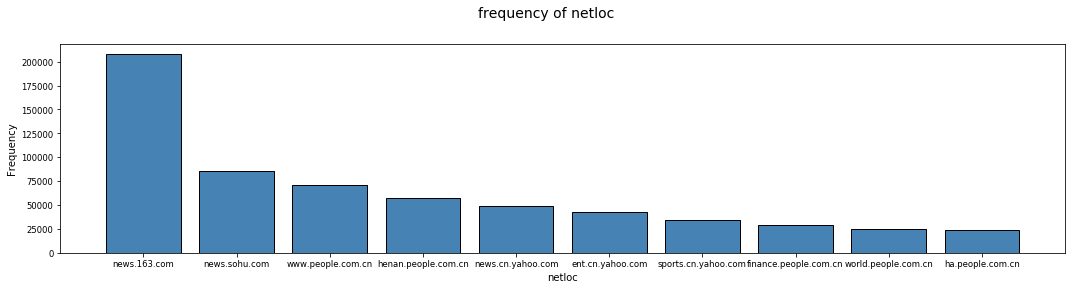

In [4]:
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle("frequency of netloc", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("netloc")
ax.set_ylabel("Frequency") 
w_q = df['label'].value_counts()
#value_counts 是按照每个值出现的次数降序排列的一个列
w_q = (list(w_q.index)[:10], list(w_q.values)[:10])
ax.tick_params(axis='both', which='major', labelsize=8.5)
#设置坐标轴样式
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

因此, 我们选取 news ent sports finance 四种类型的url 并采集相应内容的数据

In [5]:
labels=['news.163.com','ent.cn.yahoo.com','sports.cn.yahoo.com', 'finance.people.com.cn']

由于考虑到后面分词处理的时间过长, 这里每个标签下只取2000条数据, 共4个标签

In [12]:
l=[]
for label in labels:
    l.append(df[df['label']==label][:2000])
df_n=pd.concat(l)
print(df_n.label.unique())

['news.163.com' 'ent.cn.yahoo.com' 'sports.cn.yahoo.com'
 'finance.people.com.cn']


In [13]:
df_n=df_n.reset_index().drop(columns=['index'])
df_n

,Unnamed: 0,label,content
0,1029355,news.163.com,反腐，预防比治疗更重要省党代会代表、舟山嵊泗县委书记徐张艳这几年来，我们在村务公开、三公经...
1,1029356,news.163.com,到２０１７年 每万名居民拥有２名全科医生本报讯 （记者 李珩）市第四次党代会提出，要“深化医...
2,1029357,news.163.com,菲律宾欲与新加坡签军事合作协议据新华社电菲律宾国防部发言人加尔韦斯９日证实，菲律宾正在研究与...
3,1029358,news.163.com,缩量回调，今再跌空间有限？昨日大盘缩量弱势调整，是否仍将震荡继续寻底？昨晚我们连线曾在“扬子...
4,1029359,news.163.com,天津打造“八个板块”反腐新机制本报讯（记者姜明）针对集中上马项目多、集中建设工程多、集中投入...
5,1029360,news.163.com,院外评审 法官教法官本报讯（通讯员 王琪）河东法院自１９９６年开始坚持优秀裁判文书评选活动，...
6,1029361,news.163.com,瘸腿男子动车上盗５万本报讯（记者袁国礼 通讯员王海蛟）近日，市民李先生在北京站乘坐动车，其包...
7,1029362,news.163.com,中华人民共和国与南方共同市场关于进一步加强经济、贸易合作联合声明中华人民共和国（“中国”）和...
8,1029363,news.163.com,消防通道堆放杂物 两单位被要求整改本报９６７０６热线消息（记者尉伟）按照规定，消防安全通道是...
9,1029364,news.163.com,争取生态岛建设三年行动计划完美收官 崇明生态岛建设推进工作领导小组会议召开６月６日下午，副市...


In [14]:
df_n=df_n.drop(columns=['Unnamed: 0'])

In [15]:
data=df_n.replace(labels,range(4))

In [16]:
import numpy as np
label=np.array(data['label'].values)
text= np.array(data['content'].values)
print(label.shape,text.shape)

(8000,) (8000,)


#### 数据清洗

抽取之后进行重排, 对标签进行转化.

对于每个标签内的content, content是由新闻标题和内容组成. 

通过jieba分词,考虑到文章的类别, 将其按搜索引擎的结果进行分类, 通过词性去除标点以及非中文字符.

将所有词组成一个字典集并做映射后, 进行one-hot转换.(由于分类器往往默认数据是连续的,并且是有序的,但是按照前面的表示之后,数据并不是有序的, 而是随机分配的. 使用one-hot, 使得这些特征互斥, 每次只有一个激活. 数据就能因此而变得稀疏.)

In [17]:
import jieba
tmp= text[0]
# print(tmp)
import jieba.posseg as pseg
def artical2words(tmp):
    words = pseg.cut(tmp)
    l=[]
    for word, flag in words:
        if not flag=='x':
            l.append(word)
    return l



In [18]:
textwords=[]
all_words=[]

for i in range(len(text)):
    if i%200==0:
        print ("%d/80000"%(i))
    res = artical2words(text[i])
    textwords.append(res)
    all_words.extend(res)
#     textwords.append(artical2words(tmp))


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\11759\AppData\Local\Temp\jieba.cache


0/80000


Loading model cost 0.856 seconds.
Prefix dict has been built succesfully.


200/80000
400/80000
600/80000
800/80000
1000/80000
1200/80000
1400/80000
1600/80000
1800/80000
2000/80000
2200/80000
2400/80000
2600/80000
2800/80000
3000/80000
3200/80000
3400/80000
3600/80000
3800/80000
4000/80000
4200/80000
4400/80000
4600/80000
4800/80000
5000/80000
5200/80000
5400/80000
5600/80000
5800/80000
6000/80000
6200/80000
6400/80000
6600/80000
6800/80000
7000/80000
7200/80000
7400/80000
7600/80000
7800/80000


In [19]:
textwords[2]

['菲律宾',
 '欲',
 '与',
 '新加坡',
 '签',
 '军事',
 '合作',
 '协议',
 '据',
 '新华社',
 '电',
 '菲律宾',
 '国防部',
 '发言人',
 '加尔韦斯',
 '日',
 '证实',
 '菲律宾',
 '正在',
 '研究',
 '与',
 '新加坡',
 '签订',
 '军事',
 '合作',
 '协议',
 '以便',
 '两',
 '国',
 '军队',
 '将来',
 '能',
 '在',
 '训练',
 '演习',
 '等',
 '方面',
 '开展',
 '交流',
 '菲律宾',
 '与',
 '新加坡',
 '年',
 '签订',
 '过',
 '一项',
 '军事训练',
 '合作',
 '协议',
 '但',
 '两国',
 '军队',
 '的',
 '联合演习',
 '活动',
 '自',
 '年',
 '搁置',
 '至今',
 '菲律宾',
 '法律',
 '规定',
 '只有',
 '与',
 '菲律宾',
 '签订',
 '访问',
 '部队',
 '协议',
 '的',
 '国家',
 '才能',
 '进入',
 '菲',
 '领土',
 '参与',
 '联合',
 '军事演习']

In [20]:
data.head()


,label,content
0,0,反腐，预防比治疗更重要省党代会代表、舟山嵊泗县委书记徐张艳这几年来，我们在村务公开、三公经...
1,0,到２０１７年 每万名居民拥有２名全科医生本报讯 （记者 李珩）市第四次党代会提出，要“深化医...
2,0,菲律宾欲与新加坡签军事合作协议据新华社电菲律宾国防部发言人加尔韦斯９日证实，菲律宾正在研究与...
3,0,缩量回调，今再跌空间有限？昨日大盘缩量弱势调整，是否仍将震荡继续寻底？昨晚我们连线曾在“扬子...
4,0,天津打造“八个板块”反腐新机制本报讯（记者姜明）针对集中上马项目多、集中建设工程多、集中投入...


In [21]:
word_dict=pd.DataFrame(pd.Series(all_words).value_counts())
word_dict['id']= list(range(1,len(word_dict)+1))
data['words']=textwords
data['w2v']=data['words'].apply(lambda x: list(word_dict['id'][x]))


In [22]:
from keras.preprocessing import sequence
maxlen= 100
data['w2v']=list(sequence.pad_sequences(data['w2v'],maxlen=maxlen))


Using TensorFlow backend.


In [23]:
data.head()

,label,content,words,w2v
0,0,反腐，预防比治疗更重要省党代会代表、舟山嵊泗县委书记徐张艳这几年来，我们在村务公开、三公经...,"[反腐, 预防, 比, 治疗, 更, 重要, 省, 党代会, 代表, 舟山, 嵊泗, 县委书...","[1049, 1355, 4926, 2153, 539, 248, 24782, 6, 4..."
1,0,到２０１７年 每万名居民拥有２名全科医生本报讯 （记者 李珩）市第四次党代会提出，要“深化医...,"[到, 年, 每, 万名, 居民, 拥有, 名, 全科, 医生, 本报讯, 记者, 李珩, ...","[1027, 233, 37993, 2810, 15090, 104, 13959, 47..."
2,0,菲律宾欲与新加坡签军事合作协议据新华社电菲律宾国防部发言人加尔韦斯９日证实，菲律宾正在研究与...,"[菲律宾, 欲, 与, 新加坡, 签, 军事, 合作, 协议, 据, 新华社, 电, 菲律宾...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0,缩量回调，今再跌空间有限？昨日大盘缩量弱势调整，是否仍将震荡继续寻底？昨晚我们连线曾在“扬子...,"[缩量, 回调, 今, 再, 跌, 空间, 有限, 昨日, 大盘, 缩量, 弱势, 调整, ...","[1100, 1489, 3597, 321, 34, 73, 56, 1194, 991,..."
4,0,天津打造“八个板块”反腐新机制本报讯（记者姜明）针对集中上马项目多、集中建设工程多、集中投入...,"[天津, 打造, 八个, 板块, 反腐, 新机制, 本报讯, 记者, 姜明, 针对, 集中,...","[675, 1748, 629, 801, 415, 1849, 4096, 4179, 4..."


In [35]:
from sklearn.model_selection import train_test_split
import time
rdseed=(int)(time.time())
X = np.array(list(data['w2v']))
Y = np.array(list(data['label']))
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=rdseed)

In [37]:
from  keras.utils import  to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### 模型搭建及训练

通过 keras 搭建这次的的RNN模型.

#### 整个模型的结构如下

- 先是对数据进行 embedding, 学习词语间的 distributed representation 对数据进行降维

- 然后加入一个LSTM循环层, 这是RNN网络的主要部分

- 接下来是Dropout层继续降维

- 最后是一个全连接层输出模型结果


In [38]:
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import LSTM, Embedding
from keras.models import Sequential
from keras.layers import Activation, Dense
model = Sequential()
model.add(Embedding(len(word_dict)+1, 256))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=128, epochs=20)

# model.evaluate(x=x_test, y=y_test)

Epoch 1/20
6000/6000 [==============================] - 15s 3ms/step - loss: 1.0234 - acc: 0.5492
Epoch 2/20
6000/6000 [==============================] - 13s 2ms/step - loss: 0.4838 - acc: 0.8393
Epoch 3/20
6000/6000 [==============================] - 13s 2ms/step - loss: 0.1146 - acc: 0.9703
Epoch 4/20
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0334 - acc: 0.9935
Epoch 5/20
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0127 - acc: 0.9978
Epoch 6/20
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0079 - acc: 0.9987
Epoch 7/20
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0039 - acc: 0.9995
Epoch 8/20
6000/6000 [==============================] - 13s 2ms/step - loss: 0.0029 - acc: 0.9997
Epoch 9/20
1408/6000 [======>.......................] - ETA: 10s - loss: 8.2755e-04 - acc: 1.0000

KeyboardInterrupt: 

##### 从上面的训练结果可以看出, 在进行第8次迭代的时候, 模型已经开始过拟合了 训练集准确性达到了 99%

In [27]:
model.evaluate(x=x_test, y=y_test)

2000/2000 [==============================] - 2s 961us/step


[0.5482229186296463, 0.859]

## 最后在测试集上的准确率为 85.9%